> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# 패키지 설치

In [1]:
############## package
library(forecast) #ma
library(TTR) #sma
library(lmtest) #dwtest


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
options(repr.plot.width = 15, repr.plot.height = 8)


# 단순이동평균과 중심이동평균

In [2]:
z <- scan("mindex.txt")
mindex <- ts(z, start = c(1986, 1), frequency = 12)

In [3]:
mindex

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,9.3,10.7,13.3,14.1,17.8,18.1,19.4,18.8,19.1,18.4,18.0,17.0
1987,19.5,20.1,19.4,15.7,15.6,16.1,14.9,16.0,14.6,18.3,18.2,23.0
1988,22.2,22.1,18.8,17.7,13.8,12.7,16.5,15.6,16.3,10.7,10.4,7.0
1989,4.7,4.5,4.0,6.0,6.2,5.7,4.4,4.2,5.0,5.8,6.4,4.9
1990,7.9,8.2,11.8,10.0,11.1,11.7,12.4,15.2,14.0,15.2,12.9,18.0
1991,14.4,12.7,8.3,11.5,11.9,11.6,10.3,8.5,11.6,12.3,14.5,11.1
1992,11.8,12.4,12.7,9.8,10.0,10.2,9.6,6.9,5.3,4.8,4.6,1.9
1993,3.8,4.7,7.7,7.0,7.2,7.8,8.6,11.4,10.7,11.8,11.3,16.0
1994,13.2,12.0,8.5,11.4,,,,,,,,


In [4]:
SMA(mindex,n=5)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,NA,NA,NA,NA,13.04,14.80,16.54,17.64,18.64,18.76,18.74,18.26
1987,18.40,18.60,18.80,18.34,18.06,17.38,16.34,15.66,15.44,15.98,16.40,18.02
1988,19.26,20.76,20.86,20.76,18.92,17.02,15.90,15.26,14.98,14.36,13.90,12.00
1989,9.82,7.46,6.12,5.24,5.08,5.28,5.26,5.30,5.10,5.02,5.16,5.26
1990,6.00,6.64,7.84,8.56,9.80,10.56,11.40,12.08,12.88,13.70,13.94,15.06
1991,14.90,14.64,13.26,12.98,11.76,11.20,10.72,10.76,10.78,10.86,11.44,11.60
1992,12.26,12.42,12.50,11.56,11.34,11.02,10.46,9.30,8.40,7.36,6.24,4.70
1993,4.08,3.96,4.54,5.02,6.08,6.88,7.66,8.40,9.14,10.06,10.76,12.24
1994,12.60,12.86,12.20,12.22,,,,,,,,


In [5]:
ma(mindex, order=5, centre = TRUE)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,NA,NA,13.04,14.80,16.54,17.64,18.64,18.76,18.74,18.26,18.40,18.60
1987,18.80,18.34,18.06,17.38,16.34,15.66,15.44,15.98,16.40,18.02,19.26,20.76
1988,20.86,20.76,18.92,17.02,15.90,15.26,14.98,14.36,13.90,12.00,9.82,7.46
1989,6.12,5.24,5.08,5.28,5.26,5.30,5.10,5.02,5.16,5.26,6.00,6.64
1990,7.84,8.56,9.80,10.56,11.40,12.08,12.88,13.70,13.94,15.06,14.90,14.64
1991,13.26,12.98,11.76,11.20,10.72,10.76,10.78,10.86,11.44,11.60,12.26,12.42
1992,12.50,11.56,11.34,11.02,10.46,9.30,8.40,7.36,6.24,4.70,4.08,3.96
1993,4.54,5.02,6.08,6.88,7.66,8.40,9.14,10.06,10.76,12.24,12.60,12.86
1994,12.20,12.22,NA,NA,,,,,,,,


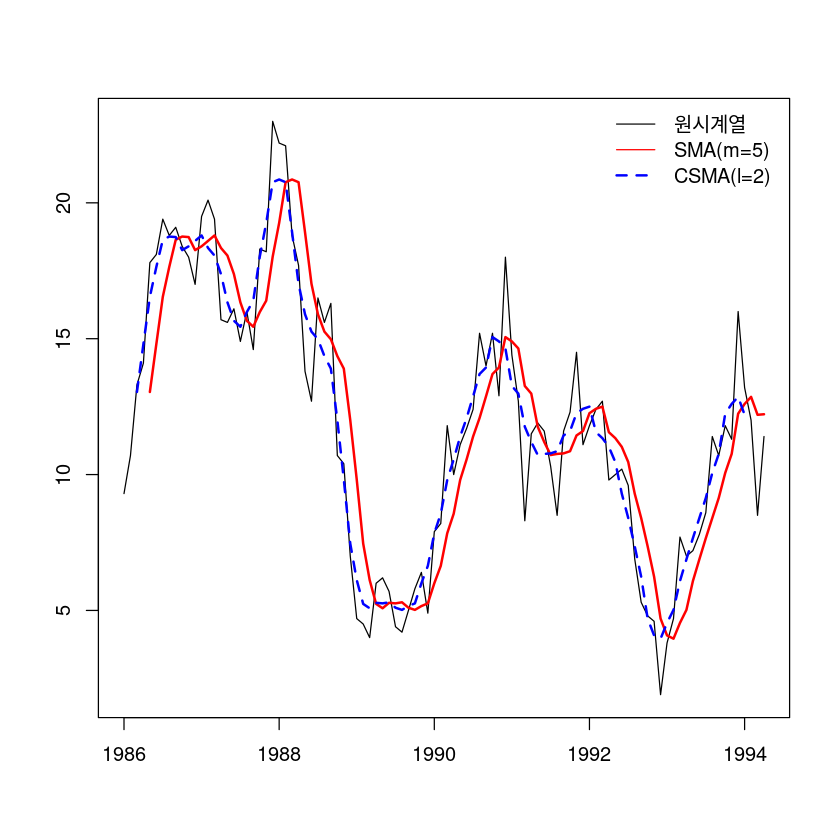

In [6]:
plot.ts(mindex, ylab="", xlab="")
lines(SMA(mindex,n=5), col='red', lwd=2)
lines(ma(mindex, order=5, centre = TRUE), col='blue',lty=2, lwd=2) # centre: 중심이동평균 할것인지
legend('topright', lty=c(1,1,2), col=c('black', 'red', 'blue'),
 lwd=c(1,1,2),
 c('원시계열', "SMA(m=5)", "CSMA(l=2)"),
 bty='n')


## 이동평균을 이용한 분해법

In [7]:
z <- scan("food.txt")
t <- 1:length(z)
food <- ts(z, start=c(1981,1), frequency=12)
log_food <- log(food) #이분산성 제거를 위한 로그변환

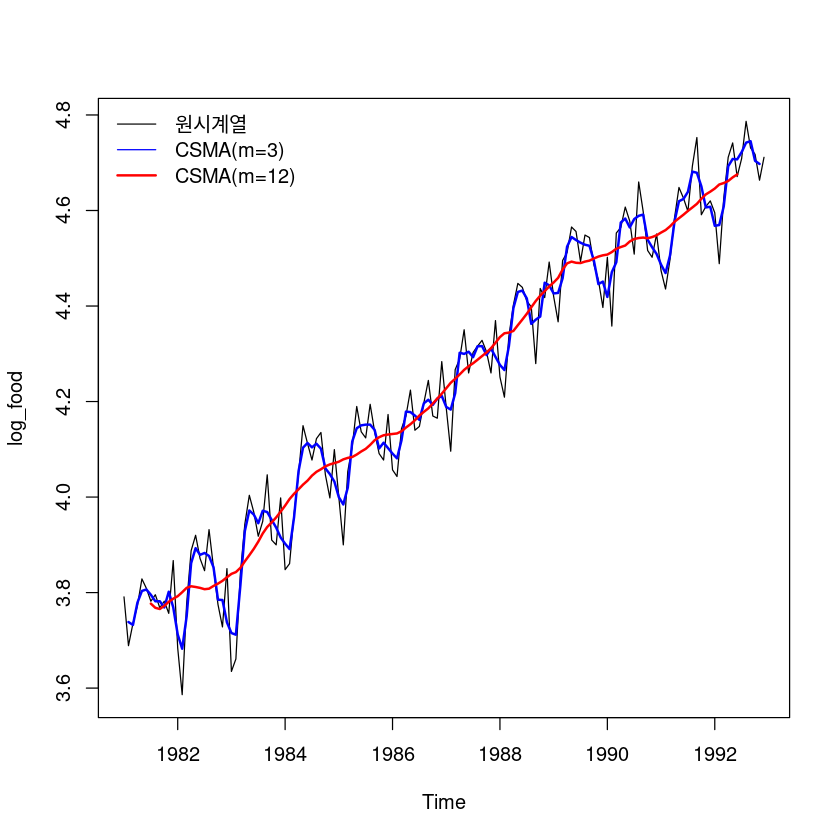

In [8]:
plot.ts(log_food)
lines(ma(log_food,3), col='blue', lwd=2)
lines(ma(log_food,12), col='red', lwd=2)
legend('topleft', lty=c(1,1,1), col=c('black', 'blue', 'red'),
     lwd=c(1,1,2),
     c('원시계열', "CSMA(m=3)", "CSMA(m=12)"),
     bty='n')

- 파란색 실선: 계절성분이 아직 남아있다.

- 빨간색 실선: 추세성분

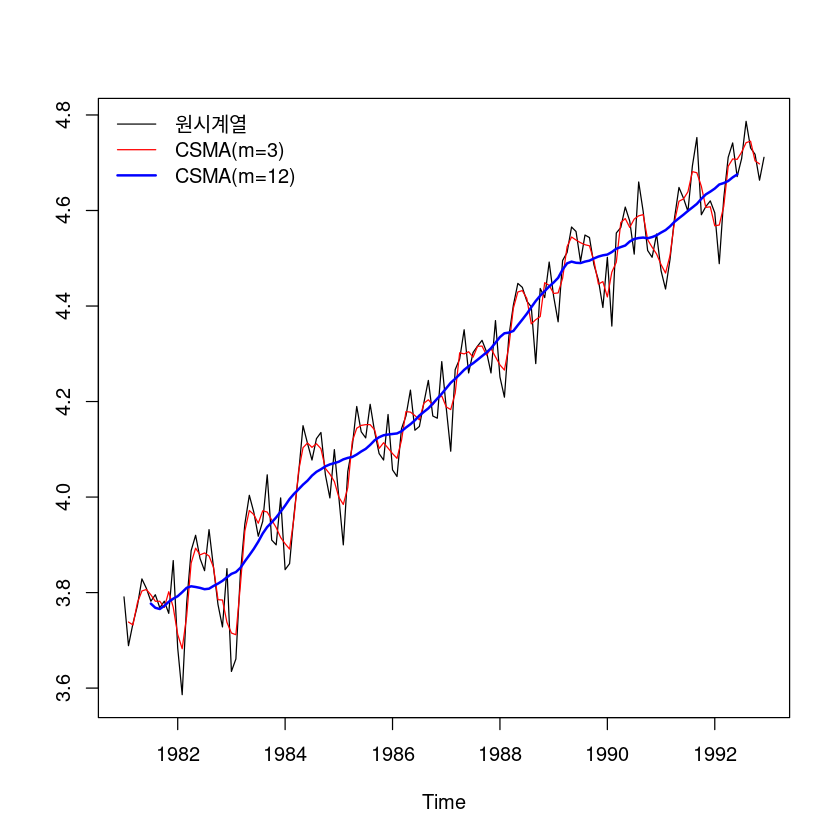

In [9]:
ts.plot(log_food,ma(log_food,3),ma(log_food,12),col=c('black', 'red', 'blue'),lwd=c(1,1,2))
legend('topleft', lty=c(1,1,1), col=c('black', 'red', 'blue'),
     lwd=c(1,1,2),
     c('원시계열', "CSMA(m=3)", "CSMA(m=12)"),
     bty='n')


### 1. 추세성분 : 계절주기와 동일한 m을 이용한 중심이동평균

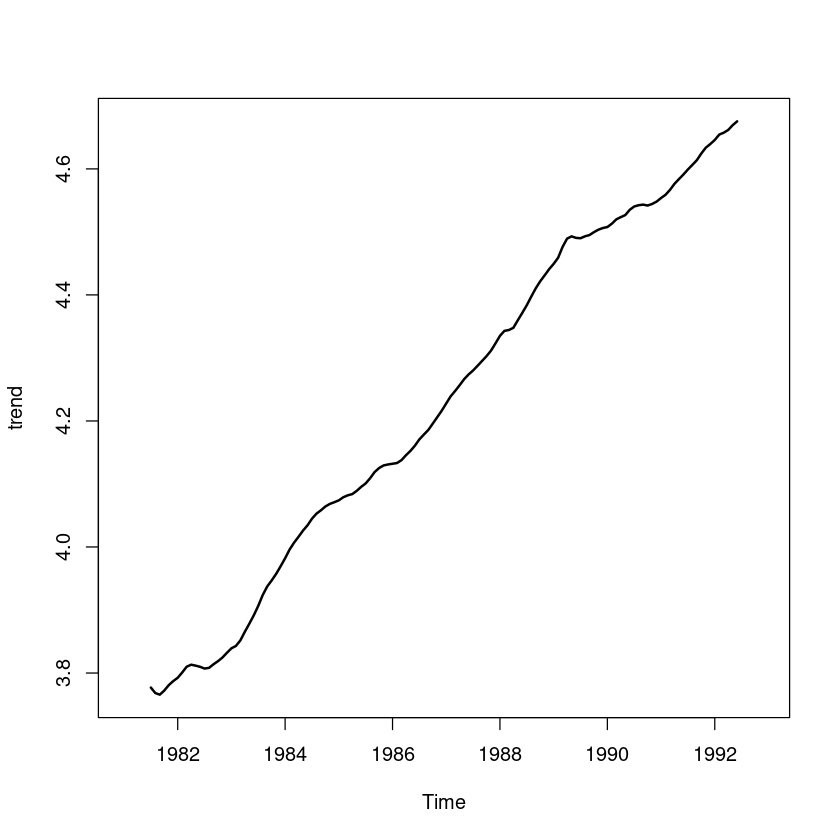

In [10]:
trend = ma(log_food, 12)
plot.ts(trend, lwd=2)

### 2. 계절성분 $Z_t - \hat{T}_t$: (추세가 조정된 시계열에서) 각 계절성분의 평균을 구한 후, 평균을 0으로 조정


In [11]:
trend  

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1981,NA,NA,NA,NA,NA,NA,3.776909,3.768171,3.765650,3.772193,3.780789,3.787192
1982,3.792454,3.800800,3.809986,3.813205,3.811735,3.809846,3.807105,3.808179,3.813880,3.818792,3.824604,3.832142
1983,3.839197,3.842931,3.851755,3.865473,3.878257,3.891586,3.906633,3.923833,3.937371,3.946951,3.957391,3.969470
1984,3.982121,3.995975,4.006874,4.016255,4.026038,4.034346,4.044893,4.052862,4.058200,4.064307,4.068383,4.071068
1985,4.074011,4.078939,4.082001,4.083920,4.089078,4.095447,4.100883,4.109219,4.118915,4.125308,4.129394,4.130955
1986,4.132087,4.133212,4.137813,4.145571,4.152502,4.160765,4.170780,4.178388,4.185752,4.195880,4.206118,4.216379
1987,4.227826,4.239234,4.247686,4.256777,4.266321,4.273846,4.280121,4.287533,4.295180,4.302811,4.311553,4.323067
1988,4.335021,4.342923,4.344312,4.347814,4.359916,4.371597,4.383732,4.397334,4.410493,4.421668,4.431175,4.440963
1989,4.449280,4.458997,4.476260,4.489322,4.492920,4.490487,4.489941,4.492986,4.495008,4.499586,4.503510,4.506159
1990,4.507716,4.512991,4.519904,4.523437,4.526672,4.535067,4.540304,4.542365,4.543296,4.541811,4.544339,4.548056


- m=12인 경우,   만약 7월 기준이면 (6,5,4,3,2,1*0.5), (8,9,10,11,12,1*0.5)   1월제외하고 1/12의 weight값이 들어가는데 1월은 1/24의 weight값이 들어간다

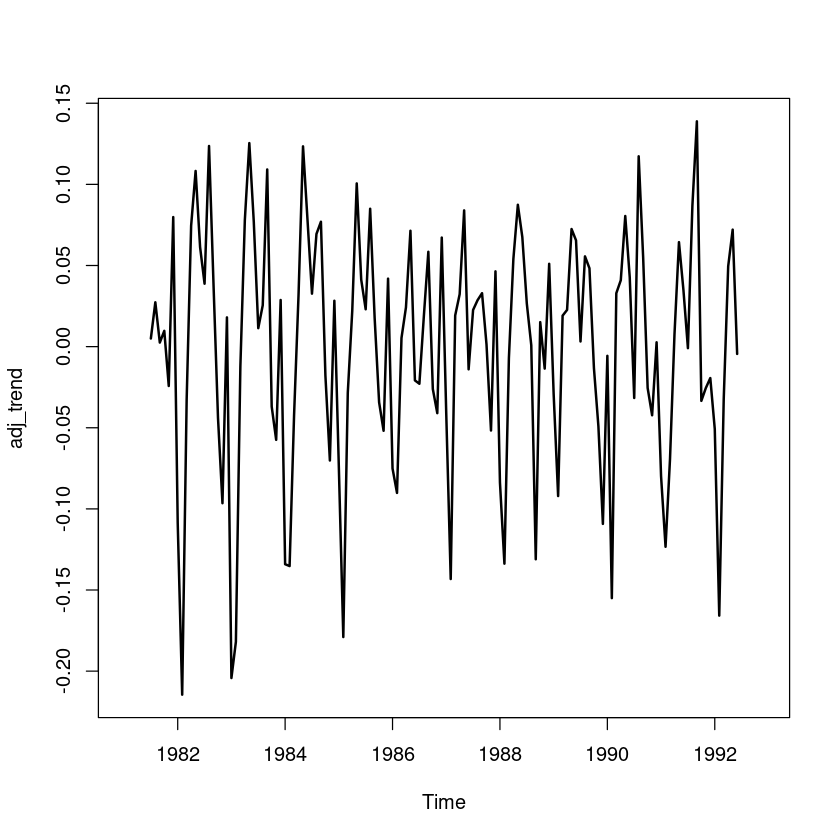

In [12]:
adj_trend <- log_food - trend
plot.ts(adj_trend, lwd=2)

In [13]:
seasonal <- tapply(adj_trend, cycle(adj_trend), function(y) mean(y,na.rm=T))
seasonal

1           2           3           4           5           6 
-0.08058938 -0.14673108 -0.01343221  0.03980949  0.08999456  0.03899139 
          7           8           9          10          11          12 
 0.00979449  0.05807463  0.04065427 -0.01862471 -0.04758747  0.02139864

- 각 월 데이터의 평균

- 아래 summary값의 `Estimate`와 동일함..

In [14]:
summary(lm(adj_trend~0+as.factor(cycle(adj_trend))))


Call:
lm(formula = adj_trend ~ 0 + as.factor(cycle(adj_trend)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.171707 -0.018376  0.001116  0.023348  0.098197 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
as.factor(cycle(adj_trend))1  -0.080589   0.011748  -6.860 3.22e-10 ***
as.factor(cycle(adj_trend))2  -0.146731   0.011748 -12.489  < 2e-16 ***
as.factor(cycle(adj_trend))3  -0.013432   0.011748  -1.143 0.255181    
as.factor(cycle(adj_trend))4   0.039809   0.011748   3.388 0.000951 ***
as.factor(cycle(adj_trend))5   0.089995   0.011748   7.660 5.28e-12 ***
as.factor(cycle(adj_trend))6   0.038991   0.011748   3.319 0.001197 ** 
as.factor(cycle(adj_trend))7   0.009794   0.011748   0.834 0.406115    
as.factor(cycle(adj_trend))8   0.058075   0.011748   4.943 2.52e-06 ***
as.factor(cycle(adj_trend))9   0.040654   0.011748   3.460 0.000748 ***
as.factor(cycle(adj_trend))10 -0.018625   0.011748  -1.585 0.115531    
as.factor(cycl

In [15]:
mean(seasonal)

[1] -0.0006872817

In [16]:
seasonal <- seasonal - mean(seasonal) #평균을 0으로 수정
seasonal


1           2           3           4           5           6 
-0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867 
          7           8           9          10          11          12 
 0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

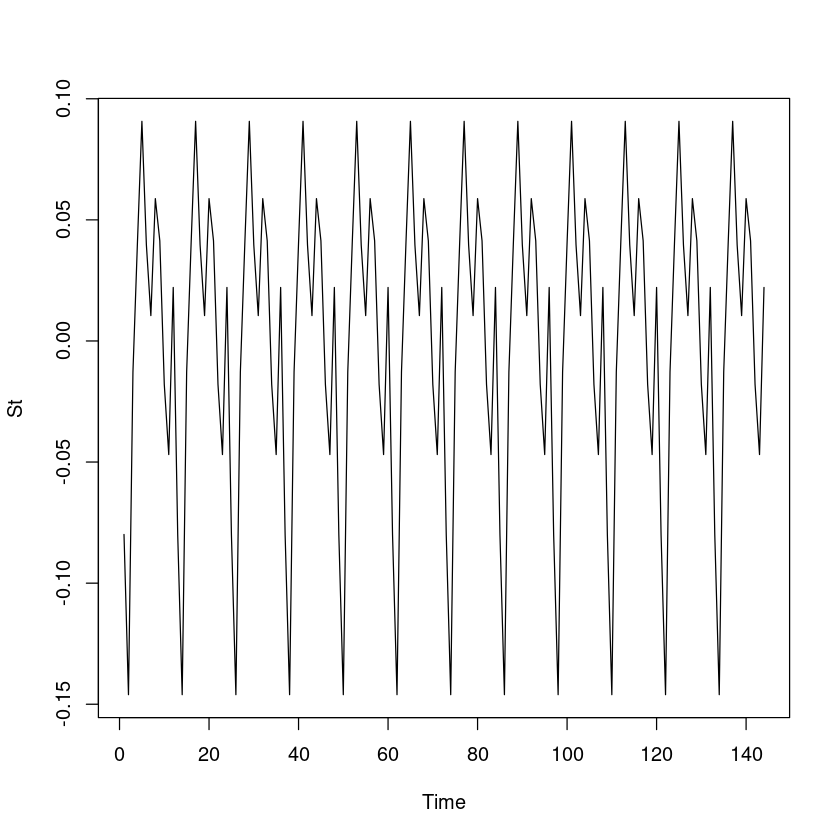

In [17]:
St = rep(seasonal, 12)
plot.ts(St)

### 3. 불규칙 성분: $\hat{I}_t = Z_t - \hat{T}_t - \hat{S}_t$

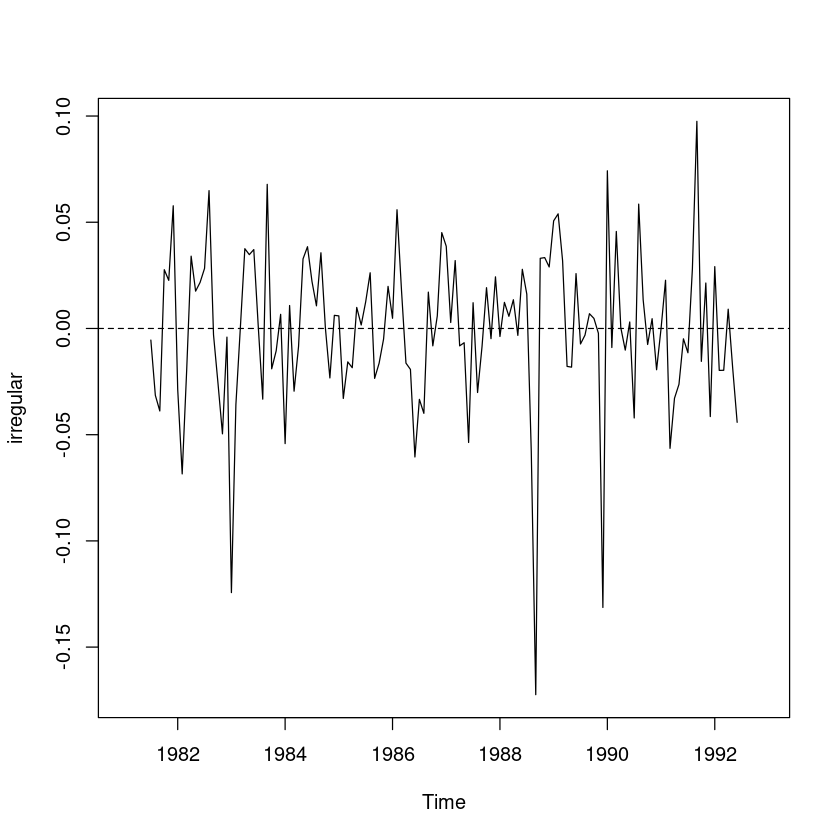

In [18]:
irregular <- log_food - trend - St
plot.ts(irregular)
abline(h=0, lty=2)

- 몇개의 이상점은 있지만 이분산성은 없어 보인다.

In [19]:
t.test(irregular)


	One Sample t-test

data:  irregular
t = -0.21173, df = 131, p-value = 0.8326
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.007108577  0.005734014
sample estimates:
    mean of x 
-0.0006872817 


In [20]:
dwtest(lm(irregular~1))


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.7816, p-value = 0.1031
alternative hypothesis: true autocorrelation is greater than 0


- 독립이다.

### 4. 추정: $\hat{Z}_t = \hat{T}_t + \hat{S}_t$

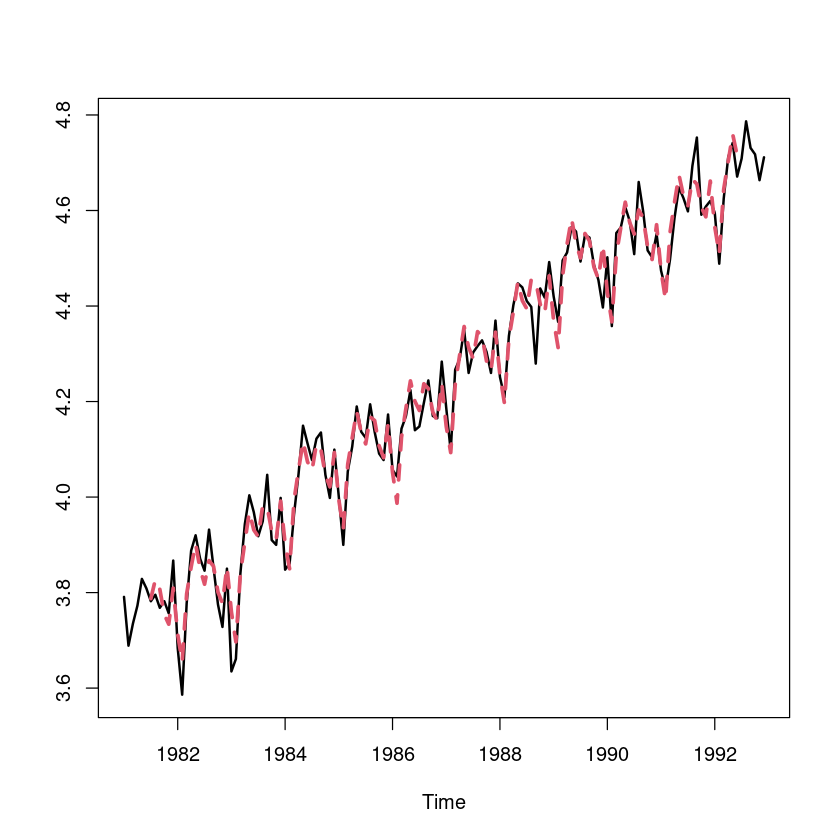

In [21]:
fit_ <- trend + St
ts.plot(log_food, fit_, lty=1:2, col=1:2, lwd=2:3)

In [28]:
sum((fit_$residuals)^2)

ERROR: Error in fit_$residuals: $ operator is invalid for atomic vectors


In [23]:
sum((food - exp(fit_))^2)

[1] NA

## decompose 함수를 이용한 분해법

- 위에서 설명한 평활법을 이용한 분해법과 동일함

In [31]:
dec_fit <- decompose(log_food, 'additive')
dec_fit

$x
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1981 3.790985 3.688879 3.735286 3.772761 3.828641 3.808882 3.781914 3.795489
1982 3.683867 3.586293 3.777348 3.887730 3.919991 3.871201 3.845883 3.931826
1983 3.634951 3.660994 3.839452 3.943522 4.003690 3.968403 3.918005 3.949319
1984 3.848018 3.860730 3.964615 4.048301 4.149464 4.112512 4.077537 4.122284
1985 4.000034 3.899950 4.053523 4.105944 4.189655 4.136765 4.123903 4.194190
1986 4.056989 4.043051 4.143135 4.169761 4.223910 4.139955 4.147885 4.197202
1987 4.186620 4.096010 4.266896 4.289089 4.350278 4.259859 4.302713 4.316154
1988 4.251348 4.209160 4.337291 4.401829 4.447346 4.439116 4.410371 4.398146
1989 4.420045 4.366913 4.495355 4.511958 4.565389 4.555980 4.493121 4.548600
1990 4.502029 4.357990 4.552824 4.564348 4.607168 4.577799 4.508659 4.659658
1991 4.473922 4.435567 4.497585 4.583947 4.648230 4.625953 4.598146 4.693181
1992 4.595120 4.488636 4.624973 4.711330 4.741448 4.670958 4.708629 4.786

In [32]:
## 비교 - Trend
trend[1:15]
dec_fit$trend[1:15]

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193 3.780789 3.787192 3.792454 3.800800 3.809986

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193 3.780789 3.787192 3.792454 3.800800 3.809986

In [33]:
## 비교 - Seasonal
St[1:12]
dec_fit$seasonal[1:12]

1           2           3           4           5           6 
-0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867 
          7           8           9          10          11          12 
 0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

[1] -0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867
 [7]  0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

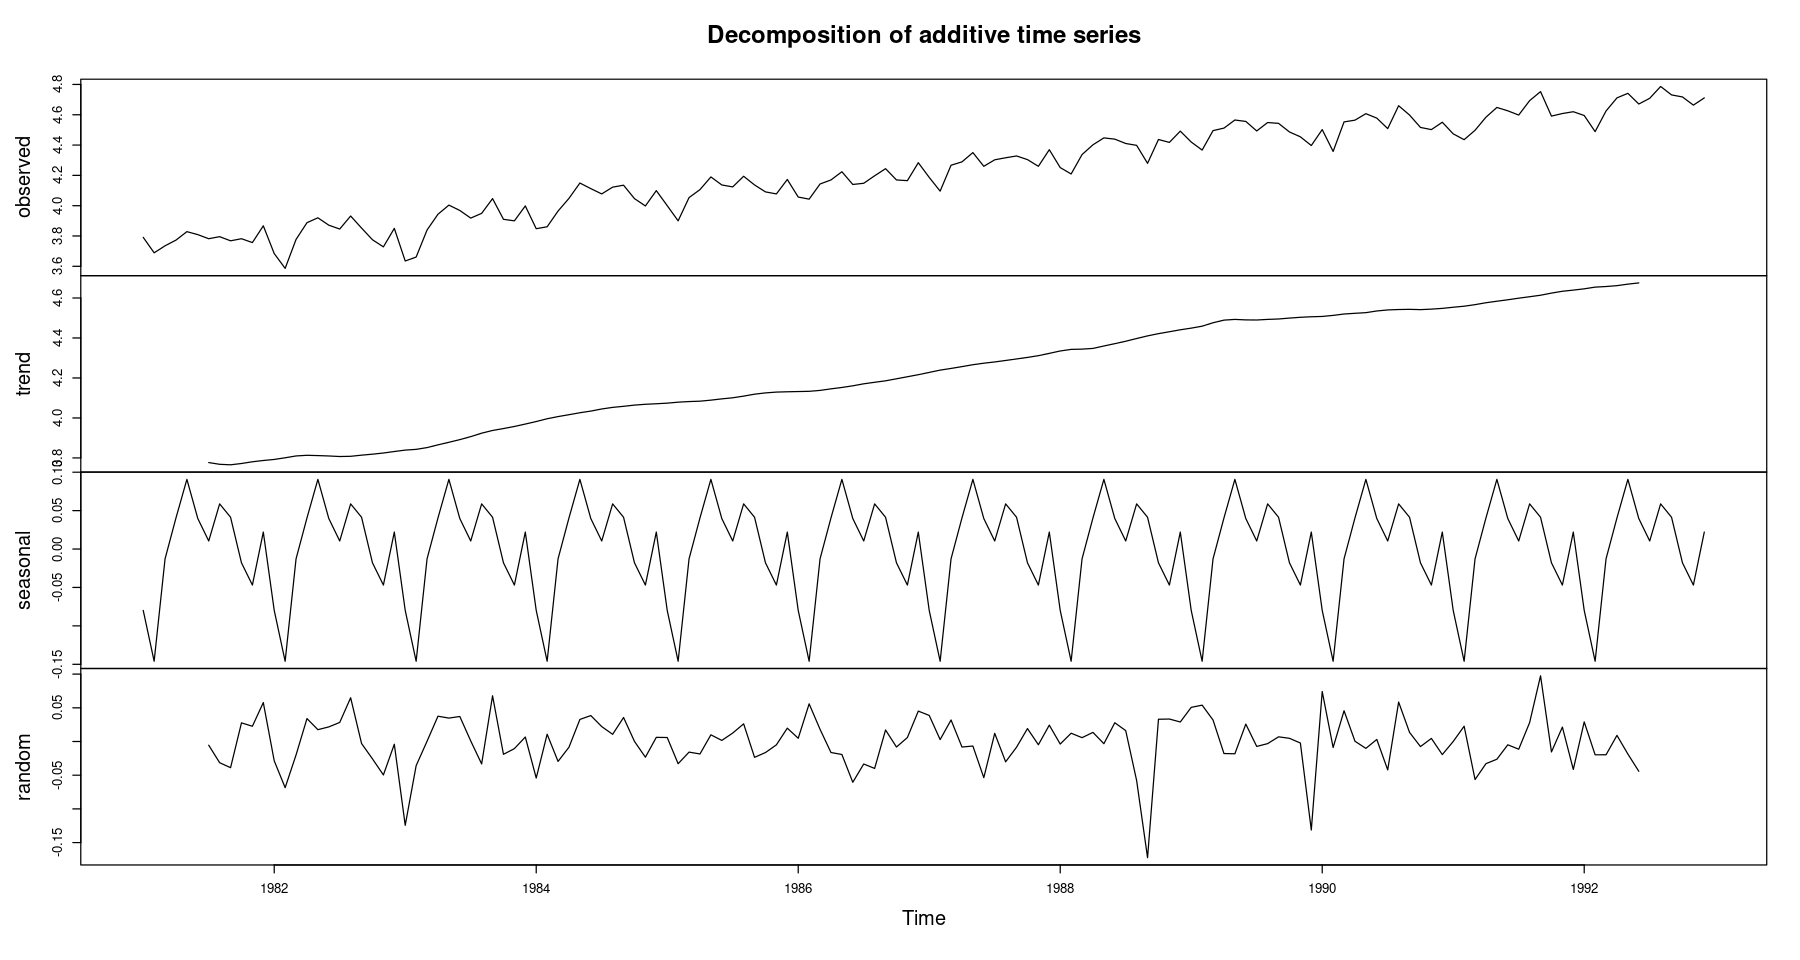

In [34]:
plot(dec_fit)

In [39]:
dec_fit2 <- decompose(food, type = "multiplicative")
dec_fit2

$x
       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1981  44.3  40.0  41.9  43.5  46.0  45.1  43.9  44.5  43.3  43.9  42.8  47.8
1982  39.8  36.1  43.7  48.8  50.4  48.0  46.8  51.0  47.1  43.6  41.6  47.0
1983  37.9  38.9  46.5  51.6  54.8  52.9  50.3  51.9  57.2  49.9  49.4  54.5
1984  46.9  47.5  52.7  57.3  63.4  61.1  59.0  61.7  62.5  57.2  54.5  60.3
1985  54.6  49.4  57.6  60.7  66.0  62.6  61.8  66.3  62.6  59.8  59.0  64.9
1986  57.8  57.0  63.0  64.7  68.3  62.8  63.3  66.5  69.7  64.7  64.4  72.5
1987  65.8  60.1  71.3  72.9  77.5  70.8  73.9  74.9  75.8  74.0  70.8  79.0
1988  70.2  67.3  76.5  81.6  85.4  84.7  82.3  81.3  72.2  84.5  82.9  89.3
1989  83.1  78.8  89.6  91.1  96.1  95.2  89.4  94.5  94.0  88.8  86.0  81.2
1990  90.2  78.1  94.9  96.0 100.2  97.3  90.8 105.6  99.3  91.5  90.2  94.7
1991  87.7  84.4  89.8  97.9 104.4 102.1  99.3 109.2 115.9  98.6 100.3 101.5
1992  99.0  89.0 102.0 111.2 114.6 106.8 110.9 119.9 113.4 111.9 106.0 11

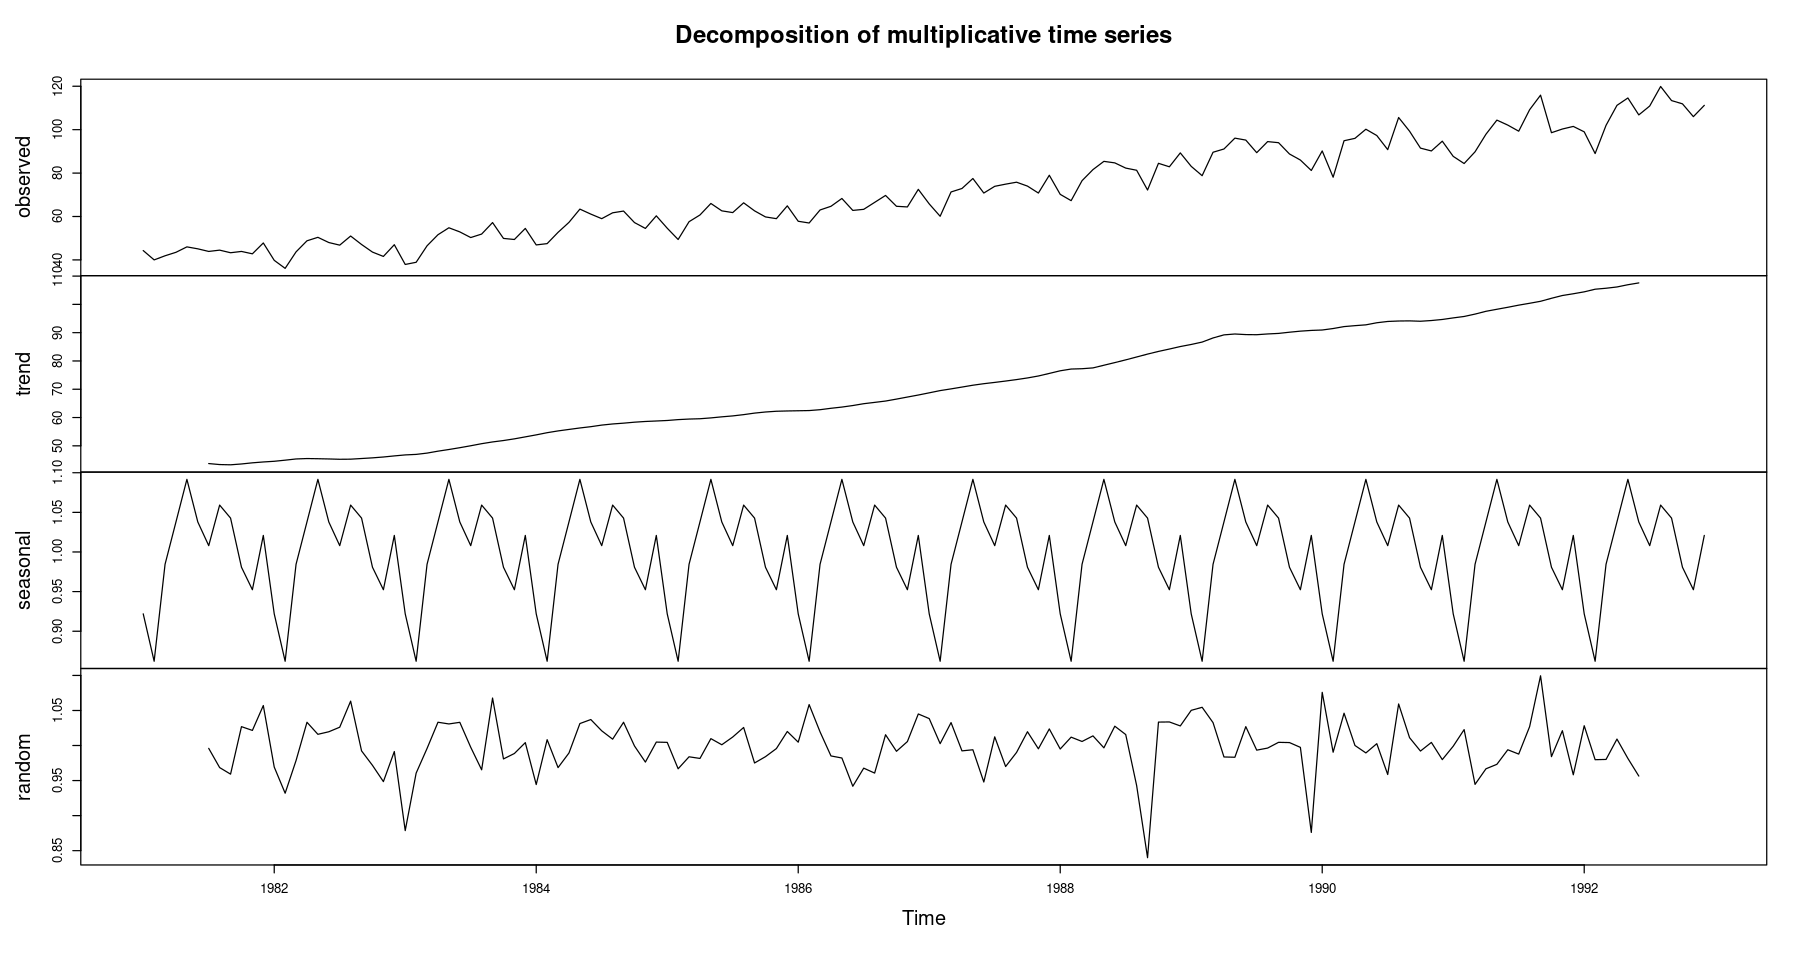

In [36]:
plot(dec_fit2)

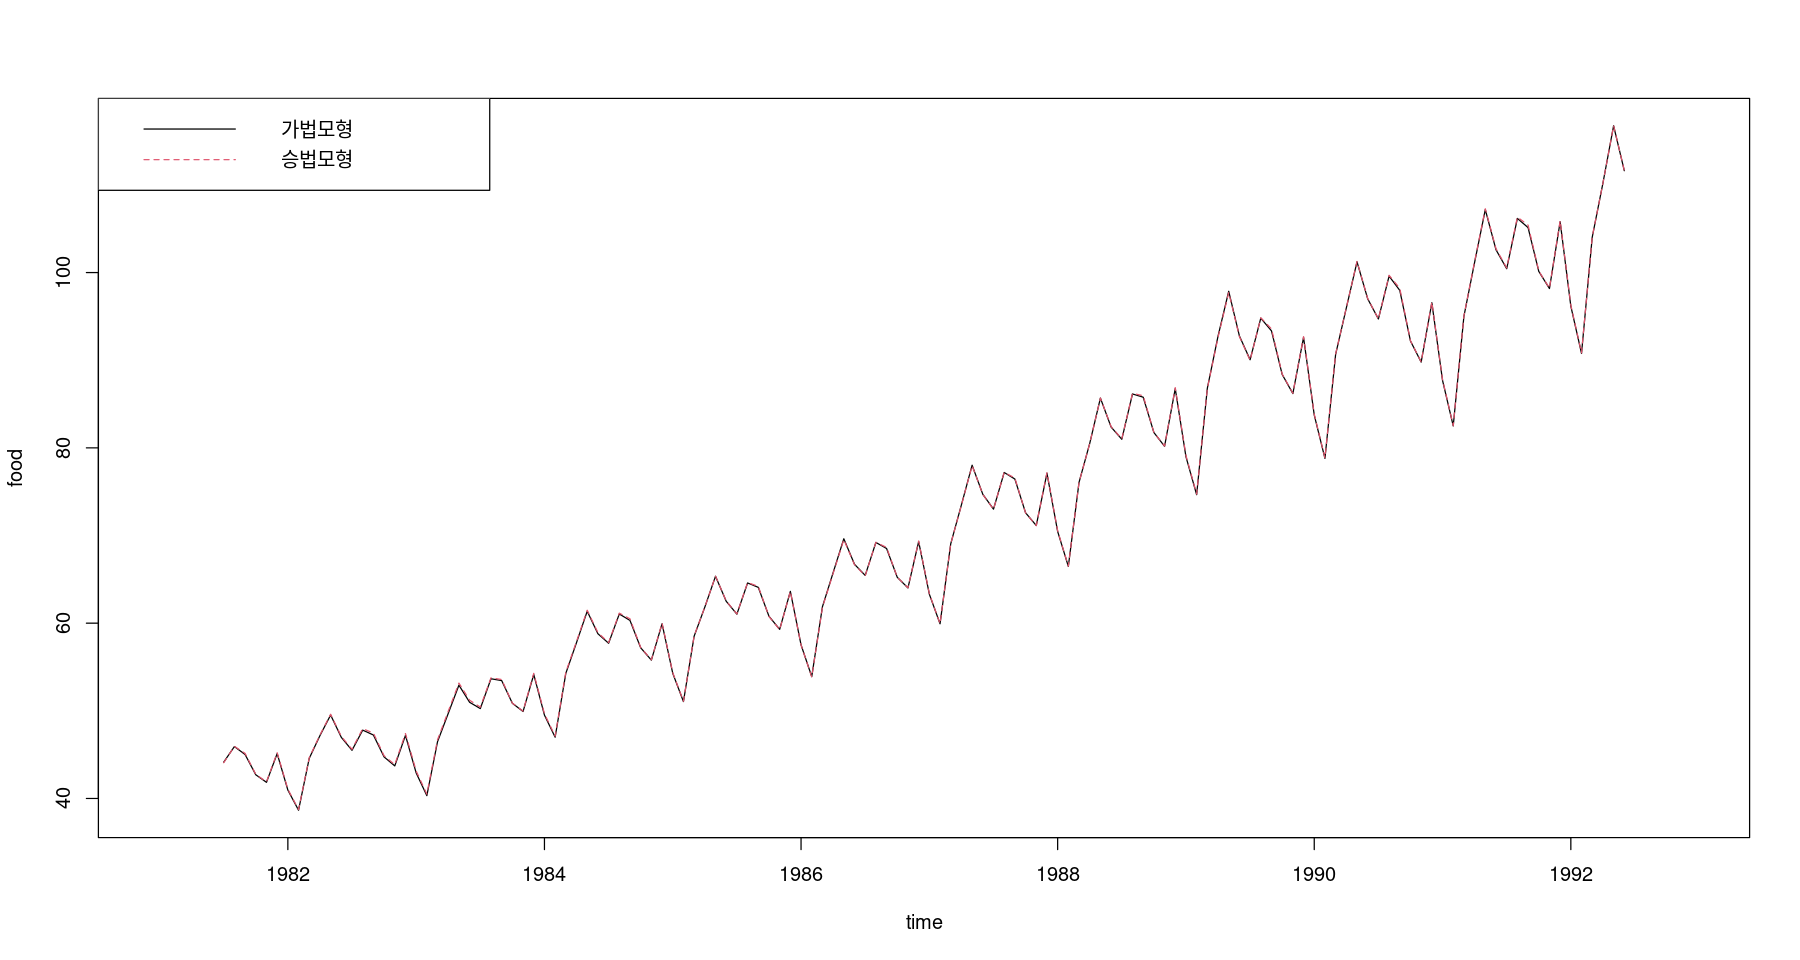

In [37]:
## 가법모형 vs. 승법모형
pred_dec <-dec_fit$trend+dec_fit$seasonal
pred_dec2 <-dec_fit2$trend*dec_fit2$seasonal

ts.plot(exp(pred_dec), pred_dec2, col=1:2, lty=1:2, ylab="food", xlab="time")
legend("topleft", lty=1:2, col=1:2, c("가법모형", "승법모형"))

In [38]:
sum((food-exp(pred_dec))^2, na.rm=T) #SSE - 가법
sum((food-pred_dec2)^2, na.rm=T) #SSE - 승법

[1] 1023.548

[1] 1018.603

## stl 함수를 이용한 분해법

In [49]:
stl_fit1 <- stl(log_food, s.window=12)
stl_fit1

 Call:
 stl(x = log_food, s.window = 12)

Components
             seasonal    trend     remainder
Jan 1981 -0.090355040 3.789108  0.0922314967
Feb 1981 -0.147931392 3.787232  0.0495793240
Mar 1981 -0.019896144 3.785355 -0.0301728541
Apr 1981  0.038295797 3.783478 -0.0490129862
May 1981  0.094538719 3.782254 -0.0481517327
Jun 1981  0.043787287 3.781031 -0.0159357336
Jul 1981  0.016322459 3.779807 -0.0142151139
Aug 1981  0.054057673 3.779134 -0.0377023021
Sep 1981  0.039065446 3.778461 -0.0493734719
Oct 1981 -0.017797397 3.777788  0.0219242129
Nov 1981 -0.051814854 3.783126  0.0252270946
Dec 1981  0.040229276 3.788464  0.0383321435
Jan 1982 -0.089173122 3.793803 -0.0207625430
Feb 1982 -0.147042503 3.798761 -0.0654256842
Mar 1982 -0.018690332 3.803720 -0.0076810928
Apr 1982  0.038138951 3.808678  0.0409133606
May 1982  0.094194552 3.809407  0.0163898255
Jun 1982  0.043112958 3.810136  0.0179524600
Jul 1982  0.015984650 3.810864  0.0190341639
Aug 1982  0.053498710 3.813796  0.0645310601
Se

In [41]:
head(stl_fit1$time.series)

,seasonal,trend,remainder
Jan 1981,-0.09035504,3.789108,0.09223150
Feb 1981,-0.14793139,3.787232,0.04957932
Mar 1981,-0.01989614,3.785355,-0.03017285
Apr 1981,0.03829580,3.783478,-0.04901299
May 1981,0.09453872,3.782254,-0.04815173
Jun 1981,0.04378729,3.781031,-0.01593573


In [42]:
t.test(stl_fit1$time.series[,3])


	One Sample t-test

data:  stl_fit1$time.series[, 3]
t = -0.18, df = 143, p-value = 0.8574
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.006341435  0.005282903
sample estimates:
    mean of x 
-0.0005292661 


In [43]:
dwtest(lm(stl_fit1$time.series[,3]~1), alternative="two.sided")


	Durbin-Watson test

data:  lm(stl_fit1$time.series[, 3] ~ 1)
DW = 1.64, p-value = 0.02962
alternative hypothesis: true autocorrelation is not 0


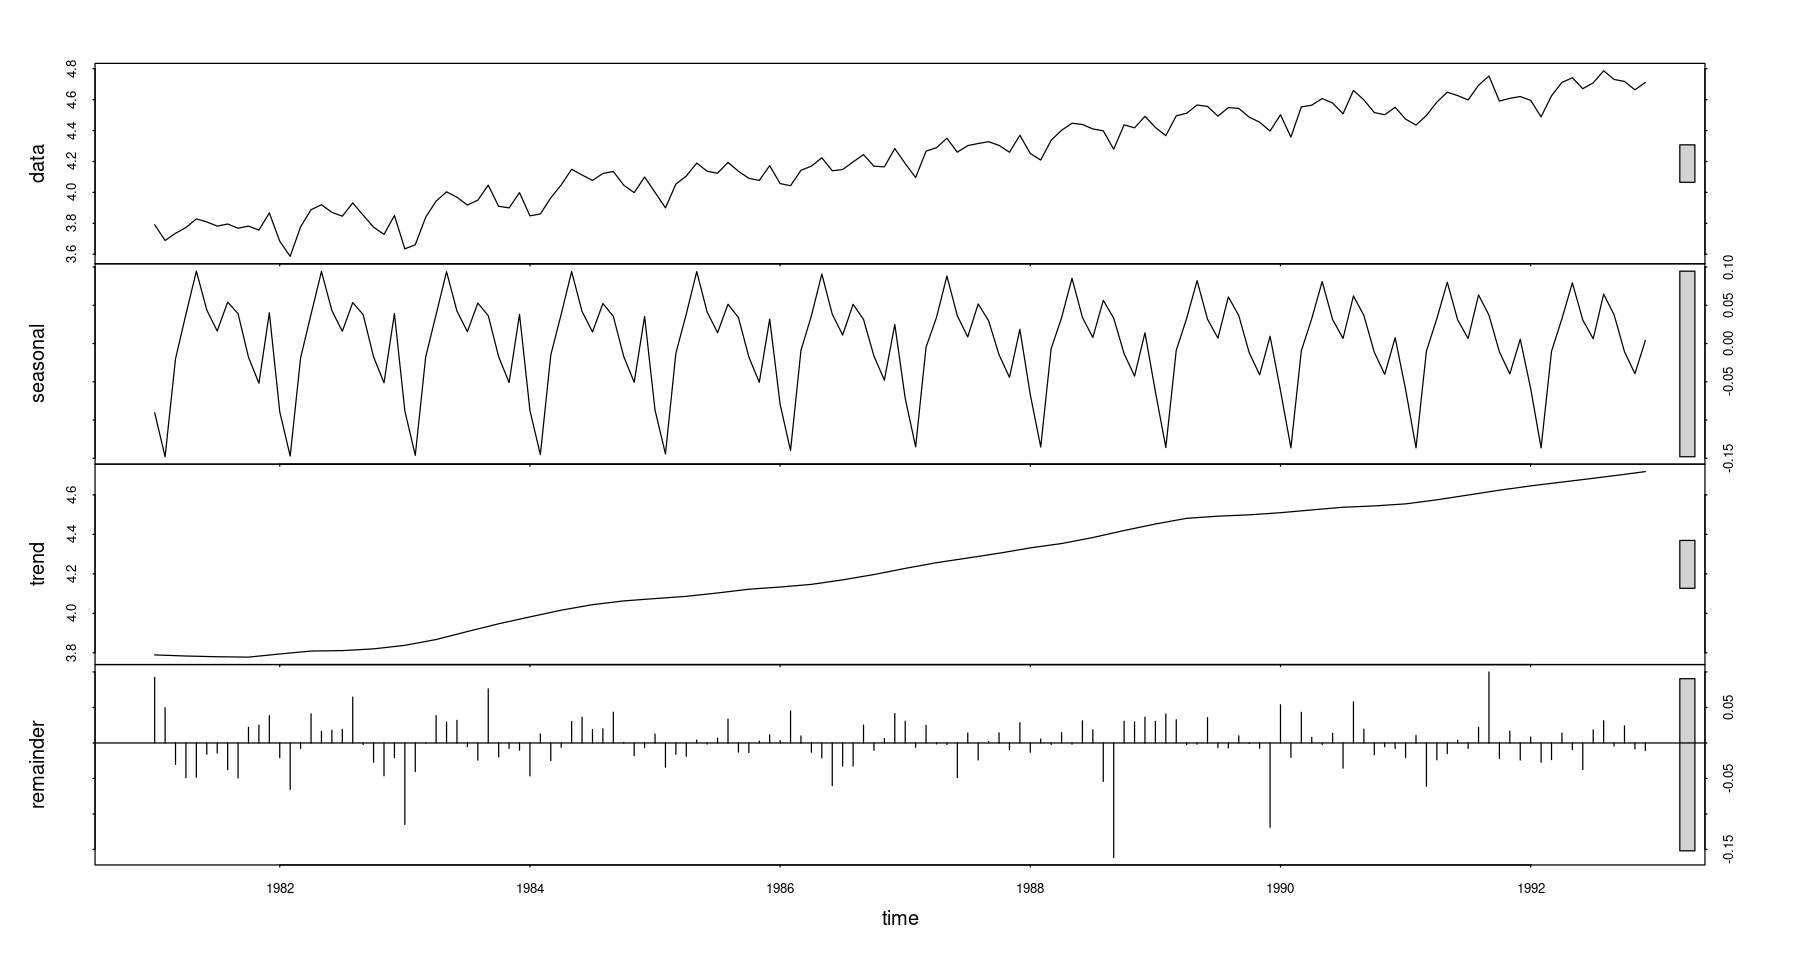

In [44]:
plot(stl_fit1)

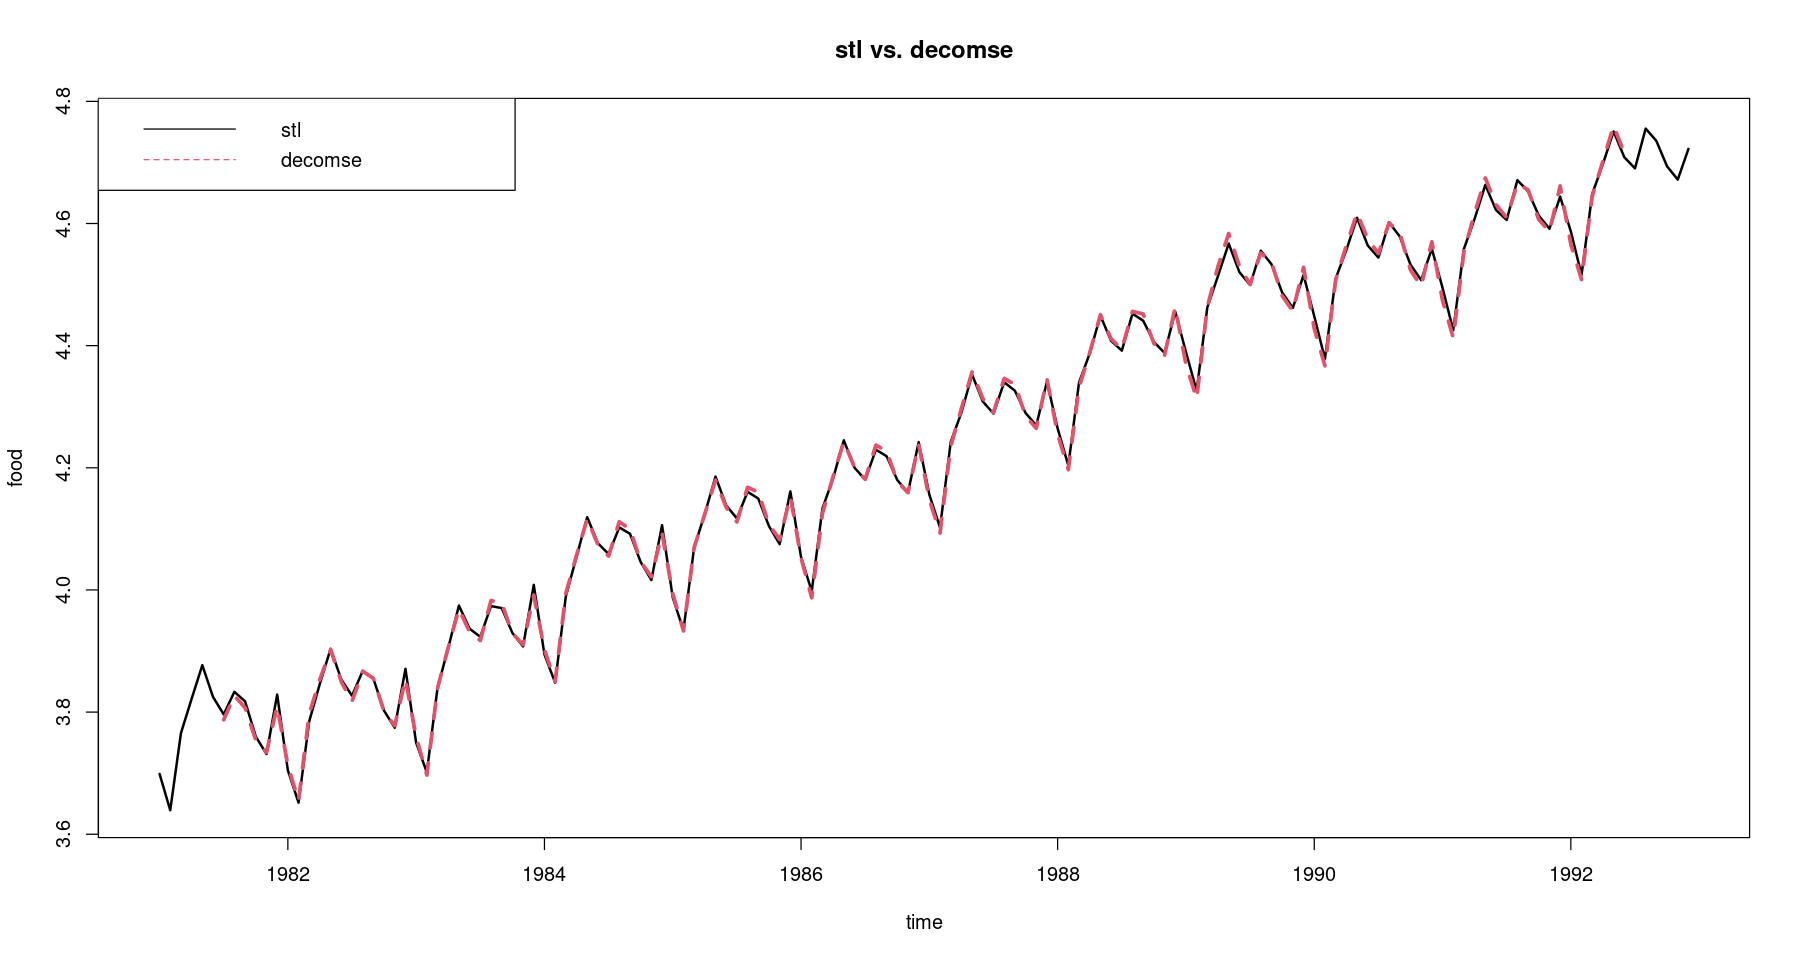

In [45]:
## stl vs. decompose
pred_stl <- stl_fit1$time.series[,1]+stl_fit1$time.series[,2]

ts.plot(pred_stl, pred_dec, col=1:2, lty=1:2, lwd=2:3, ylab="food", xlab="time",
     main="stl vs. decomse")
legend("topleft", lty=1:2, col=1:2, c("stl", "decomse"))


In [46]:
### SSE : 1-시차 후 예측 오차 제곱합
sum((log_food-pred_stl)^2) #144
sum((log_food-pred_dec)^2, na.rm=T) #144-12=132

[1] 0.1780719

[1] 0.182256

In [47]:
### MSE : 1-시차 후 예측 오차 제곱합의 평균
sum((log_food-pred_stl)^2)/144
sum((log_food-pred_dec)^2, na.rm=T)/132

[1] 0.00123661

[1] 0.001380727

In [48]:
### MSE : 1-시차 후 예측 오차 제곱합의 평균
mean((log_food-pred_stl)^2)
mean((log_food-pred_dec)^2, na.rm=T)

[1] 0.00123661

[1] 0.001380727